In [195]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

# Assignment 2 - Regression
### Predict the TOTAL COMPENSATION for this year. 

The data file provided is a salary survey for tech workers in Europe. We want to predict the total amount of compensation they bring in each year, based off of the details of their work. 

Some notes that will be important:
<ul>
    <li>The total compensation will need to be constructed, there is a column for salary, "Yearly brutto salary (without bonus and stocks) in EUR", as well as a column for bonus compensation, "Yearly bonus + stocks in EUR". 
    <li>Some categorical variables will need some work, and there isn't generally an exact answer. The main concern is things with categories that have a bunch of values with a very small count. For example, if there is only 1 person in City X, then that value likely needs to be addressed. We don't want it encoded into a new column of one 1 and thousands of 0s. 
    <li>There is an article exploring some of the data here: https://www.asdcode.de/2021/01/it-salary-survey-december-2020.html
    <li>Imputation and a bit of data manipulation will be required. 
    <li>Use any regression method you'd like. Some ones are closely related to what we've done, you may want to look at them, e.g. ExtraTreesRegressor. 
    <li>Initial accurracy, and potentially final accuracy, may not be great. When I made a plain model will little optimization the errors were large and the R2 was low. There is lots of room for optimization. 
    <li>Research challenge - try some work on the target, look into TransformedTargetRegressor and see if that helps. Recall in stats when we had skewed distributions... Maybe it helps, maybe it doesn't. 
    <li>EDA and data prep are up to you - you'll probably need to do a little exploring to figure out what cleanup is needed. When I did it, I did things kind of iteratively when I did it. For example, look at the value counts, figure out how to treat the different categories, clean something up, look at the results, potentially repeat if needed. After you figure out what needs to be done, you may be able to take some of those steps and incorporate them into a pipeline to be cleaner....
    <li><b>CRITICAL - Please make sure your code runs with RUN ALL. It should load the data that you're given, do all the processing, and spit out results. Comment out or remove anything that you've cleaned up and don't need - e.g. if you scaled a value manually, then moved that into a pipeline, don't leave the original scaling code active when the file is run.</b>
</ul>

### Details and Deliverables

You'll need to build code to produce the predictions. In particular, there's a few things that'll be marked:
<ul>
    <li>Please add a markdown cell at the bottom, and put in a few notes addressing the following:
    <ul>
        <li> Accuracy of your models with/without feature selection. Include both train/test for each. Please use R2 and RMSE. 
        <li> Feature Selection - Please identify what you did for feature selection. No need for a long explaination, something along the lines of "I did X, and the result was that 4 features were removed". Try at least 2 things. 
        <li> Hyperparameter Changes / Grid Search Improvements. What did you try, and why. Similar explaination to above, short. 
        <li> Overall this section should be roughly as long as this intro block - just outline what the results were, what you did to improve, and the results after. 
        <li> If you could use titles/bullet points I'd really appreciate it. 
    </ul>
    <li>Grade Breakdown:
    <ul>
        <li> Code is readable, there are comments: 20%
        <li> Explaination as defined above: 60% (20% each point)
        <li> Accuracy: 20% As compared to everyone else. This will be generously graded, I won't be surprised if overall accuracy is low for most people. 
    </ul>
</ul>

In [196]:
#Load Data
df = pd.read_csv("data/Euro_Salary.csv")
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Timestamp,1253,1248,24/11/2020 13:55:19,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1226.0,NaN,NaN,NaN,32.509788,5.663804,20.0,29.0,32.0,35.0,69.0
Gender,1243,3,Male,1049,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,1253,119,Berlin,681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Position,1247,148,Software Engineer,387,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total years of experience,1237,48,10,138,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Years of experience in Germany,1221,53,2,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seniority level,1241,24,Senior,565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Your main technology / programming language,1126,256,Java,184,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Other technologies/programming languages you use often,1096,562,Javascript / Typescript,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [197]:
df.sample(10)

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type
484,25/11/2020 08:12:21,31.0,Male,Berlin,ML Engineer,4,4,Junior,python,"Python, Java / Scala, AWS",62000.0,8000,30,Full-time employee,Unlimited contract,German,1000+,Product
411,24/11/2020 20:14:50,28.0,Male,Berlin,Backend Developer,9,2,Senior,PHP,"SQL, AWS, Docker",60000.0,1000,25,Full-time employee,Unlimited contract,English,11-50,Product
348,24/11/2020 17:51:26,27.0,Male,Munich,Software Engineer,5,1,Senior,Javascript,"Javascript / Typescript, Go",65000.0,NaN,22,Full-time employee,Unlimited contract,English,51-100,Product
108,24/11/2020 11:55:07,37.0,Male,Munich,Software Engineer,15,2,Senior,php,"PHP, Javascript / Typescript, SQL, Docker",75000.0,NaN,30,Full-time employee,Unlimited contract,German,101-1000,Product
120,24/11/2020 11:59:14,28.0,Male,Munich,Mobile Developer,5,3,Senior,iOS,Swift,57000.0,8000,30,Full-time employee,Unlimited contract,English,1000+,Product
139,24/11/2020 12:07:47,30.0,Male,Berlin,Backend Developer,6,2,Senior,Ruby,"SQL, Elixir",75000.0,75000,30,Full-time employee,Unlimited contract,English,101-1000,Product
38,24/11/2020 11:29:38,28.0,Male,Berlin,Backend Developer,5,1,Senior,Kotlin,"Python, Kotlin, Java / Scala, SQL, AWS, Kubern...",75000.0,NaN,25,Full-time employee,Unlimited contract,English,101-1000,Startup
191,24/11/2020 12:48:17,30.0,Female,Berlin,QA Engineer,5,3,Middle,Python,"Python, Kubernetes, Docker, Ansible",50000.0,4000,30,Full-time employee,Unlimited contract,German,101-1000,Product
954,30/11/2020 12:55:38,35.0,Male,Luttich,Data Scientist,12,0,Lead,Python,"Python, R, Spark",85000.0,95000,37.5,Full-time employee,Unlimited contract,English,1000+,Product
96,24/11/2020 11:50:04,28.0,Male,Berlin,Software Engineer,8,3,Lead,PHP,"Python, Javascript / Typescript, .NET, SQL, AW...",80000.0,NaN,30,Full-time employee,Unlimited contract,English,101-1000,Product


In [198]:
df.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,5000,30,Full-time employee,Unlimited contract,English,51-100,Product
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,80000.0,NaN,28,Full-time employee,Unlimited contract,English,101-1000,Product
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,120000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,54000.0,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product


In [199]:
# Construct Target by adding salary and bonus. 
df["Bonus"] = pd.to_numeric(df["Yearly bonus + stocks in EUR"], downcast="float", errors="coerce")
df["Bonus"].fillna(0, inplace=True)
df["target"] = df["Yearly brutto salary (without bonus and stocks) in EUR"] + df["Bonus"]
df.drop(columns={"Timestamp","Yearly brutto salary (without bonus and stocks) in EUR", "Yearly bonus + stocks in EUR", "Bonus"}, inplace=True)
df.head()

,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,target
0,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",30,Full-time employee,Unlimited contract,English,51-100,Product,85000.0
1,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,28,Full-time employee,Unlimited contract,English,101-1000,Product,80000.0
2,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,240000.0
3,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,54000.0
4,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",29,Full-time employee,Unlimited contract,English,101-1000,Product,62000.0


## Data exploration and preparation

In [200]:
#funtion to group the less frequent options into an "other" category.
def replace_low_freq(d, col, threshold=10, replacement='other'):
    value_counts = d[col].value_counts() # Specific column 
    to_remove = value_counts[value_counts <= threshold].index
    tmp = d[col].replace(to_replace=to_remove, value=replacement)
    return tmp

<AxesSubplot: xlabel='target', ylabel='Count'>

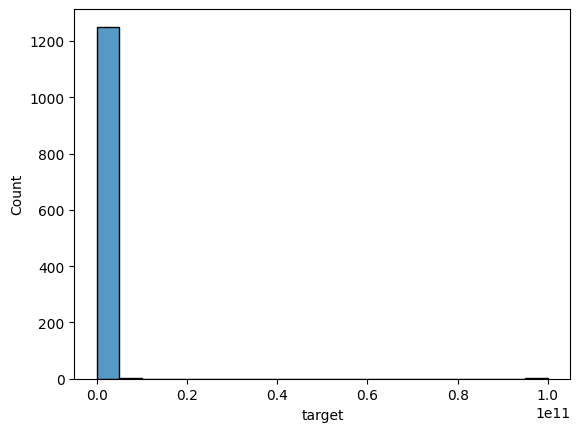

In [201]:
sns.histplot(df["target"], bins=20)

In [202]:
df = df[df['target'] < 300000]

<AxesSubplot: xlabel='target', ylabel='Count'>

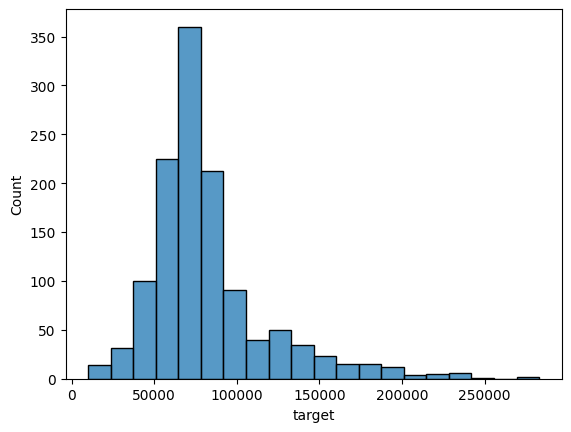

In [203]:
sns.histplot(df["target"], bins=20)

#### Target- remove outlier

In [204]:
df["Age"].isnull().sum()

25

In [205]:
#fill missing data with mean
df["Age"].fillna(df["Age"].median(), inplace=True)

#### Age - Numerical type and fill the missing data with median

In [206]:
df["Gender"] = replace_low_freq(df, "Gender", 2, "Other")
df["Gender"].value_counts()

Male      1038
Female     191
Other        2
Name: Gender, dtype: int64

In [207]:
df["Gender"].fillna("Other", inplace=True)

#### Gender - Categorical type, change less frequent and the missing value to "other" category

In [208]:
df["City"].value_counts()

Berlin         671
Munich         235
Frankfurt       44
Hamburg         40
Stuttgart       26
              ... 
Nuremberg        1
Lübeck           1
Malta            1
Dresden          1
Saarbrücken      1
Name: City, Length: 118, dtype: int64

In [209]:
df["City"] = replace_low_freq(df, "City", 10, "Other")
df["City"].value_counts()

Berlin       671
Munich       235
Other        205
Frankfurt     44
Hamburg       40
Stuttgart     26
Cologne       19
Name: City, dtype: int64

In [210]:
df["City"].isnull().sum()

0

#### City - Categorical type, change less frequent to "other" category

In [211]:
df["Position "].value_counts()

Software Engineer            384
Backend Developer            174
Data Scientist               109
Frontend Developer            88
QA Engineer                   71
                            ... 
Testautomation                 1
Recruiter                      1
DBA                            1
DB developer/Data analyst      1
IT Operations Manager          1
Name: Position , Length: 146, dtype: int64

In [212]:
df["Position "] = replace_low_freq(df, "Position ", threshold=5, replacement="Other")
df["Position "].value_counts()

Software Engineer      384
Backend Developer      174
Other                  163
Data Scientist         109
Frontend Developer      88
QA Engineer             71
DevOps                  57
Mobile Developer        53
ML Engineer             41
Product Manager         38
Data Engineer           23
Designer (UI/UX)        16
Engineering Manager     10
Data Analyst             8
Name: Position , dtype: int64

#### Position - Categorical type, change less frequent to "other" category

In [213]:
df["Total years of experience"].isnull().sum()

15

In [214]:
df["Years of experience in Germany"].isnull().sum()

30

In [215]:
#There a some "," and str value in numerical data
df["Total years of experience"].replace(",",".",regex=True, inplace=True)
df["Total years of experience"] = pd.to_numeric(df["Total years of experience"], errors="coerce")
df["Years of experience in Germany"].replace(",",".",regex=True, inplace=True)
df["Years of experience in Germany"] = pd.to_numeric(df["Years of experience in Germany"], errors="coerce")

In [216]:
df["Total years of experience"].fillna(df["Total years of experience"].median(), inplace=True)
df["Years of experience in Germany"].fillna(df["Years of experience in Germany"].median(), inplace=True)


#### Total years of experience - Numerical - replace "," to "." and fill the missing value with median
#### Years of experience in Germany - Numerical - replace "," to "." and fill the missing value with median

In [217]:
df["Seniority level"].value_counts()

Senior                                       562
Middle                                       365
Lead                                         162
Junior                                        78
Head                                          42
Principal                                      3
intern                                         1
student                                        1
Intern                                         1
Entry level                                    1
Working Student                                1
C-Level                                        1
no idea, there are no ranges in the firm       1
Student                                        1
Key                                            1
C-level executive manager                      1
Director                                       1
No level                                       1
Work Center Manager                            1
Manager                                        1
VP                  

In [218]:
df["Seniority level"] = replace_low_freq(df, "Seniority level", 5, "Other")
df["Seniority level"].value_counts()

Senior    562
Middle    365
Lead      162
Junior     78
Head       42
Other      20
Name: Seniority level, dtype: int64

#### Seniority level - Categorical type, change less frequent to "other" category

In [219]:
df["Your main technology / programming language"].value_counts()

Java                 182
Python               164
PHP                   56
C++                   37
JavaScript            34
                    ... 
SAP BW / ABAP          1
Go, PHP, SQL           1
Kotlin                 1
Jira                   1
consumer analysis      1
Name: Your main technology / programming language, Length: 253, dtype: int64

In [223]:
df["Your main technology / programming language"] = replace_low_freq(df, "Your main technology / programming language", 20, "Other")
df["Your main technology / programming language"].value_counts()

Other         464
Java          182
Python        164
PHP            56
C++            37
JavaScript     34
Javascript     31
C#             30
python         26
Scala          24
Go             23
Swift          23
Kotlin         22
Name: Your main technology / programming language, dtype: int64

#### Your main technology / programming language - Categorical type, change less frequent to "other" category

#### Other technologies/programming languages you use often -  looks repeated and not necessary

In [226]:
df["Number of vacation days"].value_counts()

30                                              488
28                                              231
27                                              102
25                                               90
26                                               70
24                                               67
29                                               23
20                                               13
21                                               10
31                                                8
22                                                8
32                                                8
36                                                5
23                                                4
35                                                4
40                                                4
0                                                 3
33                                                3
unlimited                                         3
12          

In [227]:
df["Number of vacation days"] = pd.to_numeric(df["Number of vacation days"], errors="coerce")

#### Number of vacation days - Numerical - change the "unlimited" to numerical value

In [230]:
df["Employment status"].value_counts()

Full-time employee                                                                 1180
Self-employed (freelancer)                                                           26
Part-time employee                                                                    8
Founder                                                                               3
Company Director                                                                      1
working student                                                                       1
Working Student                                                                       1
Full-time position, part-time position, & self-employed (freelancing, tutoring)       1
Intern                                                                                1
full-time, but 32 hours per week (it was my request, I'm a student)                   1
Werkstudent                                                                           1
Name: Employment status, dtype: 

In [231]:
df["Employment status"] = replace_low_freq(df, "Employment status", 5, "Other")
df["Employment status"].fillna("Other", inplace=True)
df["Employment status"].value_counts()

Full-time employee            1180
Self-employed (freelancer)      26
Other                           26
Part-time employee               8
Name: Employment status, dtype: int64

#### Employment status - Categorical type, change less frequent and the missing value to "other" category

In [232]:
df["Сontract duration"].value_counts()

Unlimited contract    1151
Temporary contract      63
Name: Сontract duration, dtype: int64

#### Сontract duration - Categorical type

# Answers and Explainations
(Expand/modify as needed)

### Results

### Feature Selection Activities

### Hyperparameter Changes